In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
#importing xlsx file in notebook
df = pd.read_excel("C:\\Users\\USER\\OneDrive\Desktop\\sydney_rain prediction.xlsx")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [15]:
columns_to_drop = ['Date','Cloud9am','Cloud3pm']
#discarding the columns from dataframe
df.drop(columns=columns_to_drop, inplace=True)

In [16]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,Yes,Yes
1,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,Yes,Yes
2,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,Yes,Yes
3,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,Yes,Yes
4,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,Yes,Yes


In [17]:
df.shape

(3337, 14)

In [18]:
# performing EDD
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,36.500000,44.700000


In [19]:
#checking for null
df.isnull().sum()

Location         0
MinTemp          3
MaxTemp          2
Rainfall         6
Evaporation     51
Sunshine        16
Humidity9am     14
Humidity3pm     13
Pressure9am     20
Pressure3pm     19
Temp9am          4
Temp3pm          4
RainToday        6
RainTomorrow     0
dtype: int64

<Axes: >

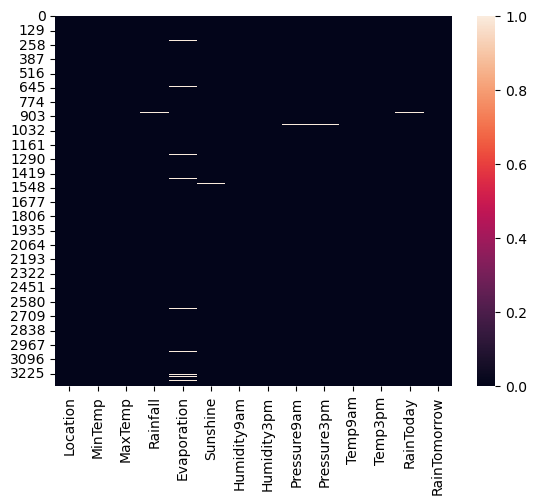

In [20]:
#plot heatmap to see null values
sns.heatmap(df.isnull())

In [21]:
#Dealing with null values with mean and mode using a for loop
for column in df.columns:
    if df[column].dtype == 'object':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    else:
        # For numeric type columns, fill with mean
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

print(df)

     Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0      Sydney     19.5     22.4      15.6     6.200000       0.0         92.0   
1      Sydney     19.5     25.6       6.0     3.400000       2.7         83.0   
2      Sydney     21.6     24.5       6.6     2.400000       0.1         88.0   
3      Sydney     20.2     22.8      18.8     2.200000       0.0         83.0   
4      Sydney     19.7     25.7      77.4     5.187432       0.0         88.0   
...       ...      ...      ...       ...          ...       ...          ...   
3332   Sydney      8.6     19.6       0.0     2.000000       7.8         73.0   
3333   Sydney      9.3     19.2       0.0     2.000000       9.2         78.0   
3334   Sydney      9.4     17.7       0.0     2.400000       2.7         85.0   
3335   Sydney     10.1     19.3       0.0     1.400000       9.3         56.0   
3336   Sydney      7.6     19.3       0.0     3.400000       9.4         73.0   

      Humidity3pm  Pressure

In [22]:
#again checking for null values
df.isnull().sum()

Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [23]:
#doing label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [24]:
for column in df.columns:
    # Check if the column is of object type 
    if df[column].dtype == 'object':
        # Fit label encoder and transform the column
        df[column] = label_encoder.fit_transform(df[column])

print(df)

      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            0     19.5     22.4      15.6     6.200000       0.0   
1            0     19.5     25.6       6.0     3.400000       2.7   
2            0     21.6     24.5       6.6     2.400000       0.1   
3            0     20.2     22.8      18.8     2.200000       0.0   
4            0     19.7     25.7      77.4     5.187432       0.0   
...        ...      ...      ...       ...          ...       ...   
3332         0      8.6     19.6       0.0     2.000000       7.8   
3333         0      9.3     19.2       0.0     2.000000       9.2   
3334         0      9.4     17.7       0.0     2.400000       2.7   
3335         0     10.1     19.3       0.0     1.400000       9.3   
3336         0      7.6     19.3       0.0     3.400000       9.4   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0            92.0         84.0       1017.6       1017.4     20.7     20.9   
1            83

In [ ]:
#DEtecting outliers and treating them with capping flooring method

<Axes: >

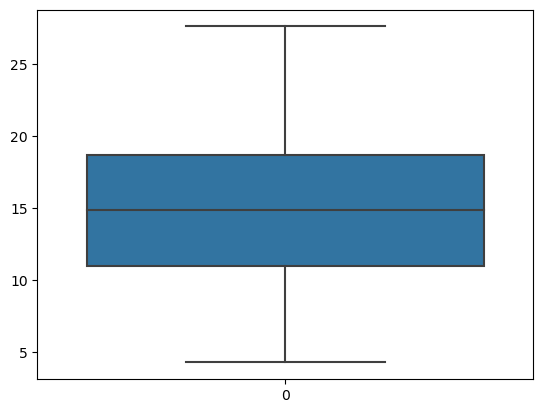

In [25]:
#no outliers found
sns.boxplot(df["MinTemp"])

<Axes: >

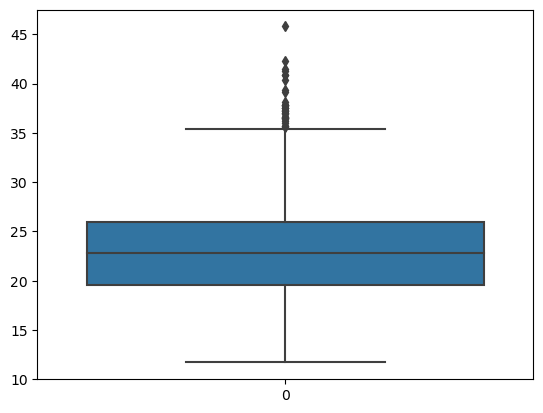

In [26]:
sns.boxplot(df["MaxTemp"])

<Axes: >

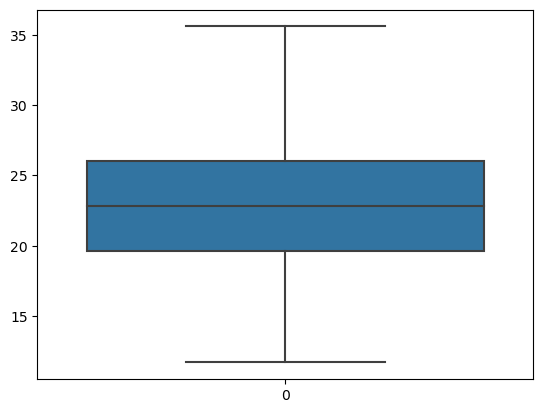

In [27]:
# removing an outliers

q1 = df['MaxTemp'].quantile(0.25)
q3 = df['MaxTemp'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['MaxTemp'] > upper_limit]
df.loc[df['MaxTemp'] < lower_limit]

df.loc[df['MaxTemp']> upper_limit ,'MaxTemp']  = upper_limit

df.loc[df['MaxTemp']< lower_limit ,'MaxTemp']  = lower_limit

#again ploting boxplot

sns.boxplot(df["MaxTemp"])

<Axes: >

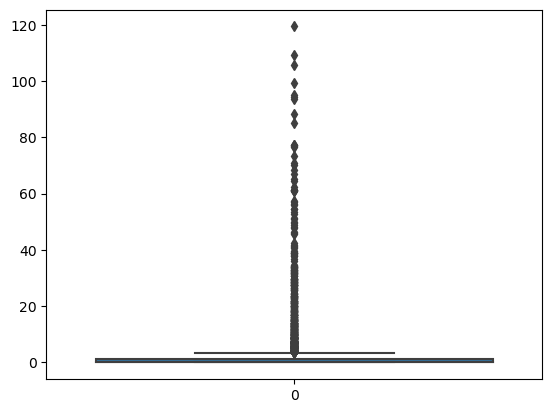

In [28]:
sns.boxplot(df["Rainfall"])

<Axes: >

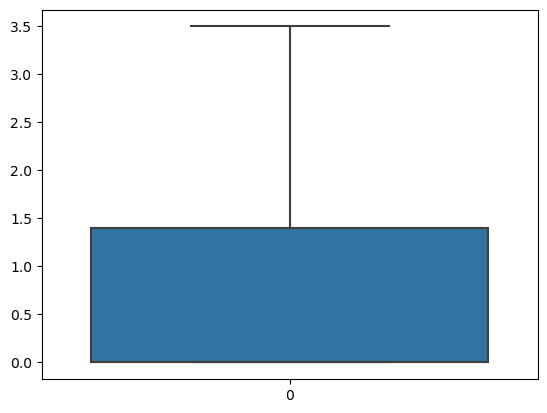

In [29]:
q1 = df['Rainfall'].quantile(0.25)
q3 = df['Rainfall'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Rainfall'] > upper_limit]
df.loc[df['Rainfall'] < lower_limit]

df.loc[df['Rainfall']> upper_limit ,'Rainfall']  = upper_limit

df.loc[df['Rainfall']< lower_limit ,'Rainfall']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Rainfall"])

<Axes: >

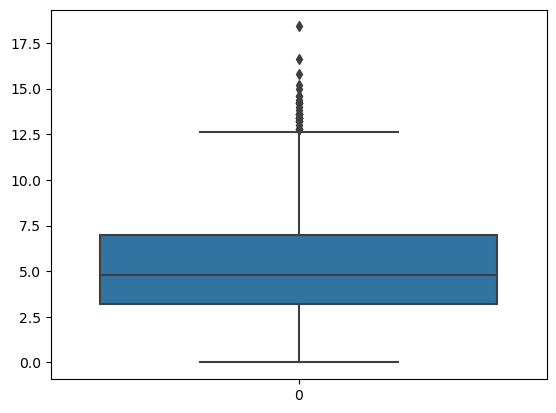

In [30]:
sns.boxplot(df["Evaporation"])

<Axes: >

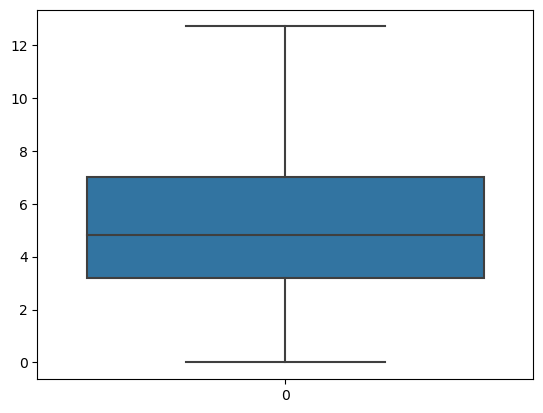

In [31]:
q1 = df['Evaporation'].quantile(0.25)
q3 = df['Evaporation'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Evaporation'] > upper_limit]
df.loc[df['Evaporation'] < lower_limit]

df.loc[df['Evaporation']> upper_limit ,'Evaporation']  = upper_limit

df.loc[df['Evaporation']< lower_limit ,'Evaporation']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Evaporation"])

<Axes: >

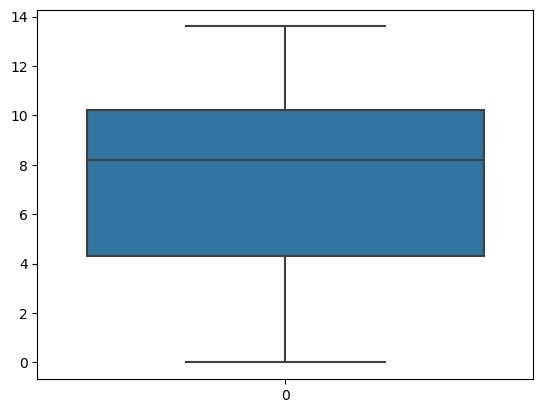

In [32]:
sns.boxplot(df["Sunshine"])

<Axes: >

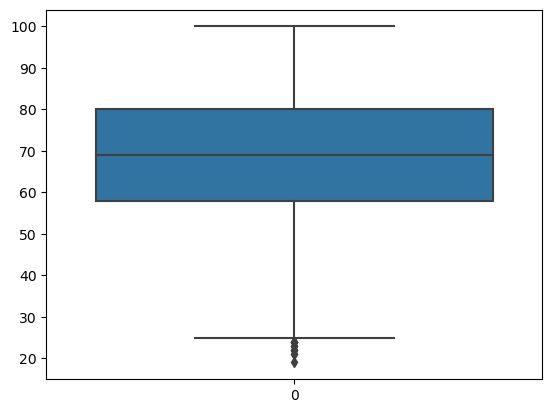

In [33]:
sns.boxplot(df["Humidity9am"])

<Axes: >

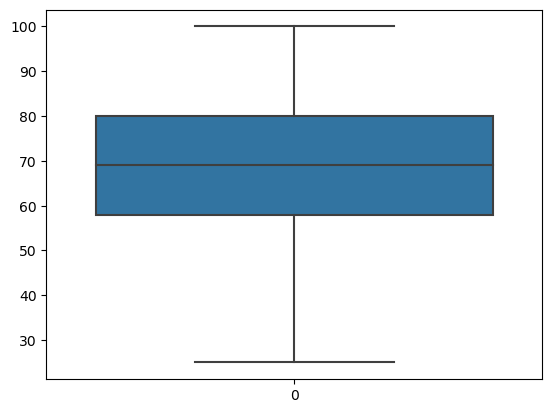

In [34]:
q1 = df['Humidity9am'].quantile(0.25)
q3 = df['Humidity9am'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Humidity9am'] > upper_limit]
df.loc[df['Humidity9am'] < lower_limit]

df.loc[df['Humidity9am']> upper_limit ,'Humidity9am']  = upper_limit

df.loc[df['Humidity9am']< lower_limit ,'Humidity9am']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Humidity9am"])

<Axes: >

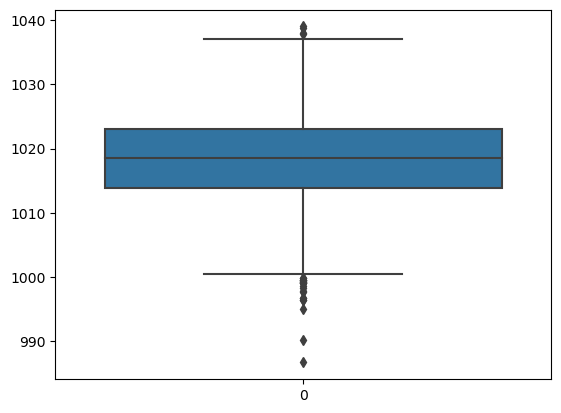

In [35]:
sns.boxplot(df["Pressure9am"])

<Axes: >

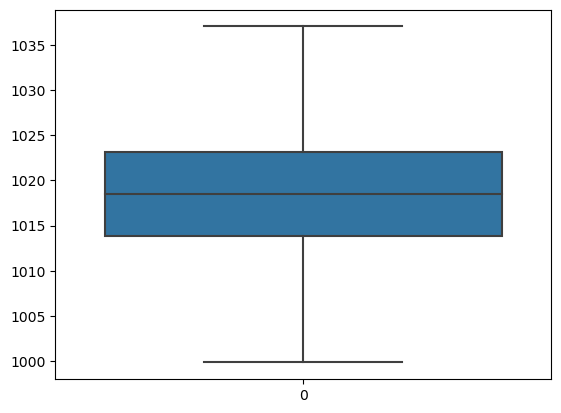

In [36]:
q1 = df['Pressure9am'].quantile(0.25)
q3 = df['Pressure9am'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Pressure9am'] > upper_limit]
df.loc[df['Pressure9am'] < lower_limit]

df.loc[df['Pressure9am']> upper_limit ,'Pressure9am']  = upper_limit

df.loc[df['Pressure9am']< lower_limit ,'Pressure9am']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Pressure9am"])

<Axes: >

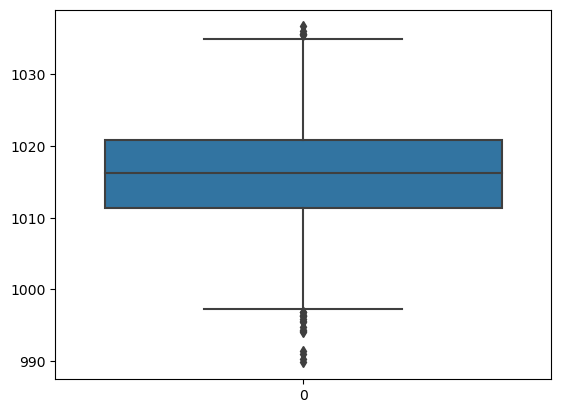

In [37]:
sns.boxplot(df["Pressure3pm"])

<Axes: >

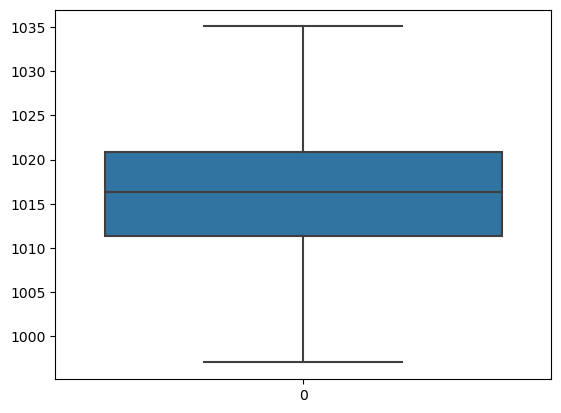

In [38]:
q1 = df['Pressure3pm'].quantile(0.25)
q3 = df['Pressure3pm'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Pressure3pm'] > upper_limit]
df.loc[df['Pressure3pm'] < lower_limit]

df.loc[df['Pressure3pm']> upper_limit ,'Pressure3pm']  = upper_limit

df.loc[df['Pressure3pm']< lower_limit ,'Pressure3pm']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Pressure3pm"])

<Axes: >

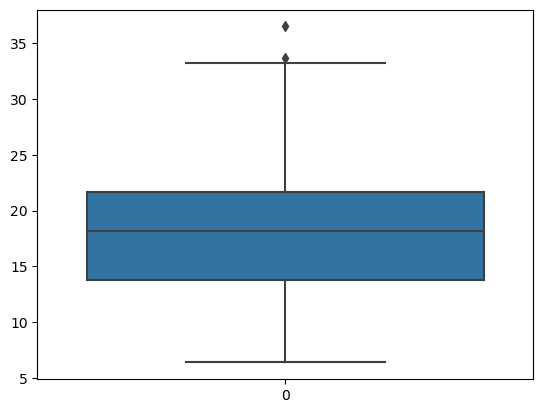

In [39]:
sns.boxplot(df["Temp9am"])

<Axes: >

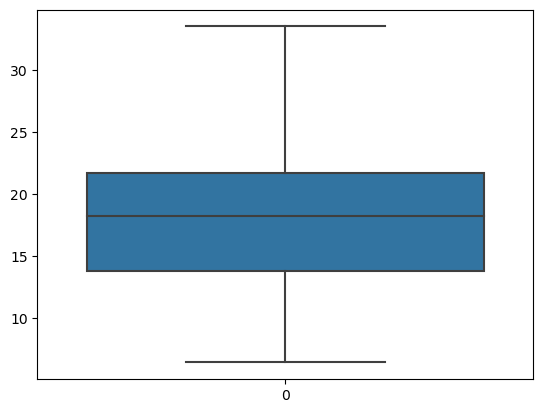

In [40]:
q1 = df['Temp9am'].quantile(0.25)
q3 = df['Temp9am'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Temp9am'] > upper_limit]
df.loc[df['Temp9am'] < lower_limit]

df.loc[df['Temp9am']> upper_limit ,'Temp9am']  = upper_limit
df.loc[df['Temp9am']< lower_limit ,'Temp9am']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Temp9am"])

<Axes: >

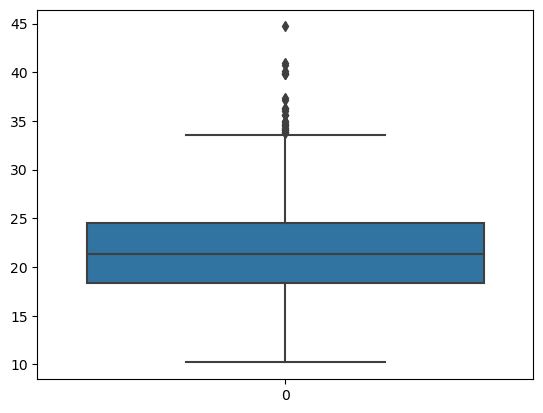

In [41]:
sns.boxplot(df["Temp3pm"])

<Axes: >

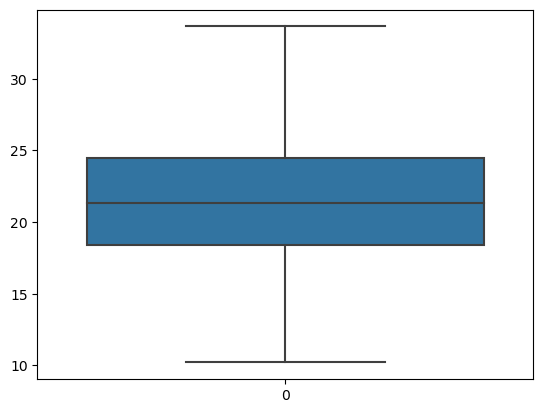

In [42]:
q1 = df['Temp3pm'].quantile(0.25)
q3 = df['Temp3pm'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

df.loc[df['Temp3pm'] > upper_limit]
df.loc[df['Temp3pm'] < lower_limit]

df.loc[df['Temp3pm']> upper_limit ,'Temp3pm']  = upper_limit
df.loc[df['Temp3pm']< lower_limit ,'Temp3pm']  = lower_limit

#again ploting boxplot checking outlier ifany

sns.boxplot(df["Temp3pm"])

In [43]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,1,1
1,0,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,1,1
2,0,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,1,1
3,0,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,1,1
4,0,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,1,1


In [44]:
df.isnull().sum()

Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
#Traning and Testing the dataset

In [ ]:
#define x and y

In [45]:
x = df.drop("RainTomorrow",axis =1)
y = df['RainTomorrow']

In [38]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
3332    0
3333    0
3334    0
3335    0
3336    0
Name: RainTomorrow, Length: 3337, dtype: int32


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train_test_split(x,y,test_size = 0.2)

[      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 220          0      9.4     17.5       0.0     3.400000       9.9   
 2939         0     12.1     22.3       0.0     7.600000       9.9   
 340          0     20.2     28.3       0.0    10.000000      11.8   
 250          0     10.9     19.7       0.0     5.187432      10.0   
 233          0     15.8     21.6       0.0     9.000000      10.9   
 ...        ...      ...      ...       ...          ...       ...   
 2403         0     19.6     27.2       3.5    11.000000       6.9   
 3161         0     22.7     26.6       0.0     6.800000       0.0   
 752          0     23.2     35.4       0.0     9.400000      11.9   
 2829         0     19.1     24.8       3.5     7.600000       0.8   
 3031         0     11.8     14.7       2.4     3.200000       0.0   
 
       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
 220          68.0         51.0       1019.5       1018.2     13.9     16.4   


In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 51)

In [49]:
print(x_train,x_train.shape)

      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
1098         0     27.6     35.6       0.0    12.700000       2.6   
1100         0     18.7     25.3       0.2     4.800000       3.9   
3017         0     10.9     25.2       0.0     4.800000       9.2   
2119         0     20.4     29.1       3.5     4.200000      11.2   
606          0     11.4     21.0       0.0     4.000000      11.1   
...        ...      ...      ...       ...          ...       ...   
1733         0     20.3     22.9       0.0     7.400000       0.9   
1760         0     19.3     26.2       3.5     5.187432       4.5   
485          0     11.6     18.8       3.5     1.200000       2.8   
2105         0     17.1     23.3       1.2     7.200000       3.2   
3070         0     12.5     24.7       0.0     8.000000      11.1   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
1098         56.0         77.0       1012.7       1016.1     28.7     22.8   
1100         67

In [ ]:
#lets build a model

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
LR = LogisticRegression()

In [52]:
LR.fit(x_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
LR.coef_

array([[ 0.        , -0.19253867,  0.15157171,  0.28767754,  0.10958151,
        -0.25381231,  0.00235268,  0.0573265 , -0.06421058,  0.06040877,
         0.07005772, -0.0793637 ,  0.08156189]])

In [54]:
LR.intercept_

array([0.00188248])

In [55]:
#predicting values
LR.predict_proba(x)

array([[0.08682898, 0.91317102],
       [0.28413687, 0.71586313],
       [0.12909828, 0.87090172],
       ...,
       [0.73630717, 0.26369283],
       [0.97647683, 0.02352317],
       [0.96900585, 0.03099415]])

In [56]:
y_pred = (LR.predict_proba(x)[:,1]>= 0.3)
y_pred #setting boundry conditins

array([ True,  True,  True, ..., False, False, False])

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix (y,y_pred)

array([[2071,  401],
       [ 252,  613]], dtype=int64)

In [59]:
from sklearn.metrics import precision_score,recall_score

In [60]:
precision_score(y,y_pred)

0.6045364891518737

In [61]:
recall_score(y,y_pred)

0.7086705202312139

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
roc_auc_score(y,y_pred)

0.7732268458761247

In [ ]:
# implementing LDA

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [65]:
CLR_lda = LinearDiscriminantAnalysis()

In [66]:
CLR_lda.fit(x, y)
y_pred_LDA = CLR_lda.predict(x)
y_pred_LDA

array([1, 1, 1, ..., 0, 0, 0])

In [67]:
#again creating confusion_matrix
confusion_matrix (y,y_pred_LDA)

array([[2262,  210],
       [ 357,  508]], dtype=int64)

In [ ]:
#implementing KNN

In [68]:
from sklearn import preprocessing

In [69]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [70]:
x_train_s = scaler.transform(x_train)

In [71]:
scaler = preprocessing.StandardScaler().fit(x_test)

In [72]:
x_test_s = scaler.transform(x_test)

In [73]:
#building a model
from sklearn.neighbors import KNeighborsClassifier

In [74]:
CLF_KNN_1 =  KNeighborsClassifier(n_neighbors=5)
CLF_KNN_1.fit(x_train_s,y_train)


KNeighborsClassifier()

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
#calculate accuracy
accuracy = accuracy_score (y_test,CLF_KNN_1.predict(x_test_s))
print(accuracy)

0.8203592814371258


In [ ]:
#Implementing Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
cl_tree = DecisionTreeClassifier(criterion = 'gini')
cl_tree.fit(x_train,y_train)


DecisionTreeClassifier()

In [79]:
#predict value on trained model
y_train_pred =cl_tree.predict(x_train) 
y_test_pred =cl_tree.predict(x_test) 

In [ ]:
#evaluating model performance using testdata

In [80]:
from sklearn.metrics import mean_squared_error,r2_score

In [81]:
r2_score(y_train,y_train_pred)

1.0

In [82]:
r2_score(y_test,y_test_pred)

-0.22264642472152385

In [83]:
#checking accuracy of model  
cl_tree.score(x_test,y_test)

0.7559880239520959

In [84]:
from sklearn.ensemble import BaggingClassifier

In [85]:
# Create Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=cl_tree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [86]:
# Train the model
bagging_model.fit(x_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [87]:
y_pred_bg = bagging_model.predict(x_test)
y_pred_bg

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [88]:
#drawing confusion matrix
confusion_matrix(y_test,bagging_model.predict(x_test))

array([[453,  31],
       [ 92,  92]], dtype=int64)

In [89]:
accuracy_score(y_test,bagging_model.predict(x_test))

0.8158682634730539

In [90]:
#implementing Randomforest
from sklearn.ensemble import RandomForestClassifier

In [91]:
# Create Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [92]:
# Train the model
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
 # predictions
y_pred = random_forest.predict(x_test)

In [94]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8263473053892215

In [ ]:
# gridsearch

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [96]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [97]:
#Define hyperparameters for grid search

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10]
    
}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

In [ ]:
print("Best parameters:", grid_search.best_params_)

In [ ]:
# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred_gs = best_model.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred_gs)
accuracy

In [ ]:
#questions

1 view
Building a model for rainfall prediction using classification involves categorizing weather conditions into classes such as "rainy" or "not rainy" based on various features like humidity, temperature, wind speed, etc. Here are some key steps and considerations for building such a model:

Data Collection: Gather historical weather data including features like humidity, temperature, wind speed, pressure, etc., along with the corresponding rainfall data.

Data Preprocessing: Clean the data by handling missing values, outliers, and inconsistencies. Normalize or scale the features if needed.

Feature Selection/Engineering: Identify the most relevant features for rainfall prediction. You may need domain knowledge or conduct feature importance analysis to determine which features are most influential.

Split Data: Split the dataset into training and testing sets to evaluate the model's performance.

Choose Classification Algorithm: Select an appropriate classification algorithm such as Logistic Regression, Decision Trees, Random Forest, Support Vector Machines, or Neural Networks. The choice may depend on the dataset size, complexity, and computational resources available.

Train the Model: Train the chosen classification algorithm on the training data. Adjust hyperparameters through techniques like cross-validation to optimize model performance.

Evaluate the Model: Evaluate the trained model on the testing data using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to assess its performance.

Tune the Model: Fine-tune the model by adjusting parameters or trying different algorithms to improve performance if necessary.

Deployment and Monitoring: Once satisfied with the model's performance, deploy it into production for real-time predictions. Continuously monitor and update the model as new data becomes available or as the environment changes.

Consider Imbalanced Data: If the dataset is imbalanced (e.g., significantly more non-rainy days than rainy days), techniques like resampling or using algorithms robust to class imbalance should be considered to prevent bias in the model.

Validation: Validate the model's predictions against real-world observations to ensure its reliability and accuracy.



2approach to solving this task
Load the Data and Data Preprocessing:
Load the historical weather data containing features like temperature, humidity, air pressure, wind speed, and precipitation.
Perform data preprocessing steps such as handling missing values, encoding categorical variables if any, and scaling or 
normalizing numerical features as necessary.
Decision Tree Classification:

Train a Decision Tree classifier on the preprocessed data.
Generate a confusion matrix to evaluate the performance of the Decision Tree classifier.
Ensemble Methods:

Implement Bagging and Boosting techniques along with the Random Forest Classifier.
Train these ensemble models on the preprocessed data.
Evaluate each model's accuracy and generate confusion matrices for comparison.
Model Comparison:

Compare the accuracy scores and performance of the Decision Tree classifier, Bagging, Boosting, and Random Forest models.
Identify the model with the highest accuracy score.
Analysis of the Best Model:

Take the best-performing model and analyze why it performed better than the other models. Consider factors such as the ability to capture complex relationships, handling of noisy data, and generalization capability.
Write a summary explaining the strengths of the selected model and how it outperformed the others.
Improving Model Accuracy:

2 approach to solving this task
Load the Data and Data Preprocessing:
Load the historical weather data containing features like temperature, humidity, air pressure, wind speed, and precipitation.
Perform data preprocessing steps such as handling missing values, encoding categorical variables if any, and scaling or 
normalizing numerical features as necessary.
Decision Tree Classification:

Train a Decision Tree classifier on the preprocessed data.
Generate a confusion matrix to evaluate the performance of the Decision Tree classifier.
Ensemble Methods:

Implement Bagging and Boosting techniques along with the Random Forest Classifier.
Train these ensemble models on the preprocessed data.
Evaluate each model's accuracy and generate confusion matrices for comparison.
Model Comparison:

Compare the accuracy scores and performance of the Decision Tree classifier, Bagging, Boosting, and Random Forest models.
Identify the model with the highest accuracy score.
Analysis of the Best Model:

Take the best-performing model and analyze why it performed better than the other models. Consider factors such as the ability to capture complex relationships, handling of noisy data, and generalization capability.
Write a summary explaining the strengths of the selected model and how it outperformed the 



3 ML model options you had to perform this task
logistic regression
KNN
LDA
DEcision Treee classification
random forest
Gread search

4
To determine which model performs best, we need compare the accuracy scores and other evaluation 
after doing that random forest and gridsearch giving a best accurecy

5  take to improve this selected model’s performance even furthe

To further improve the performance of the selected model 
(e.g., Random Forest Classifier with ensemble techniques), here are some additional steps you can take:
Hyperparameter Tuning:

Grid Search or Random Search: Conduct a more exhaustive search over a wider range of hyperparameters 
to find the optimal combination 
for the Random Forest model. 
Tune parameters such as n_estimators, max_depth, min_samples_split, and min_samples_leaf.
Optimize Ensemble Parameters: Adjust parameters related to ensemble techniques,
such as the number of estimators in Bagging or the learning rate in Boosting, to further improve model performance.

